# 1. Data Preprocessing 

In [3]:
import pandas as pd 

In [4]:
!pip install pandas 

In [5]:
car = pd.read_csv('CarPrice.csv')

In [6]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
car.duplicated().sum()

np.int64(0)

In [9]:
car.shape

(205, 26)

# 2. EDA

In [13]:
!pip install seaborn matplotlib scikit-learn 

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [27]:
X = car.iloc[:, :-1]  # All columns except the last one
y = car.iloc[:, -1]   # Only the last column

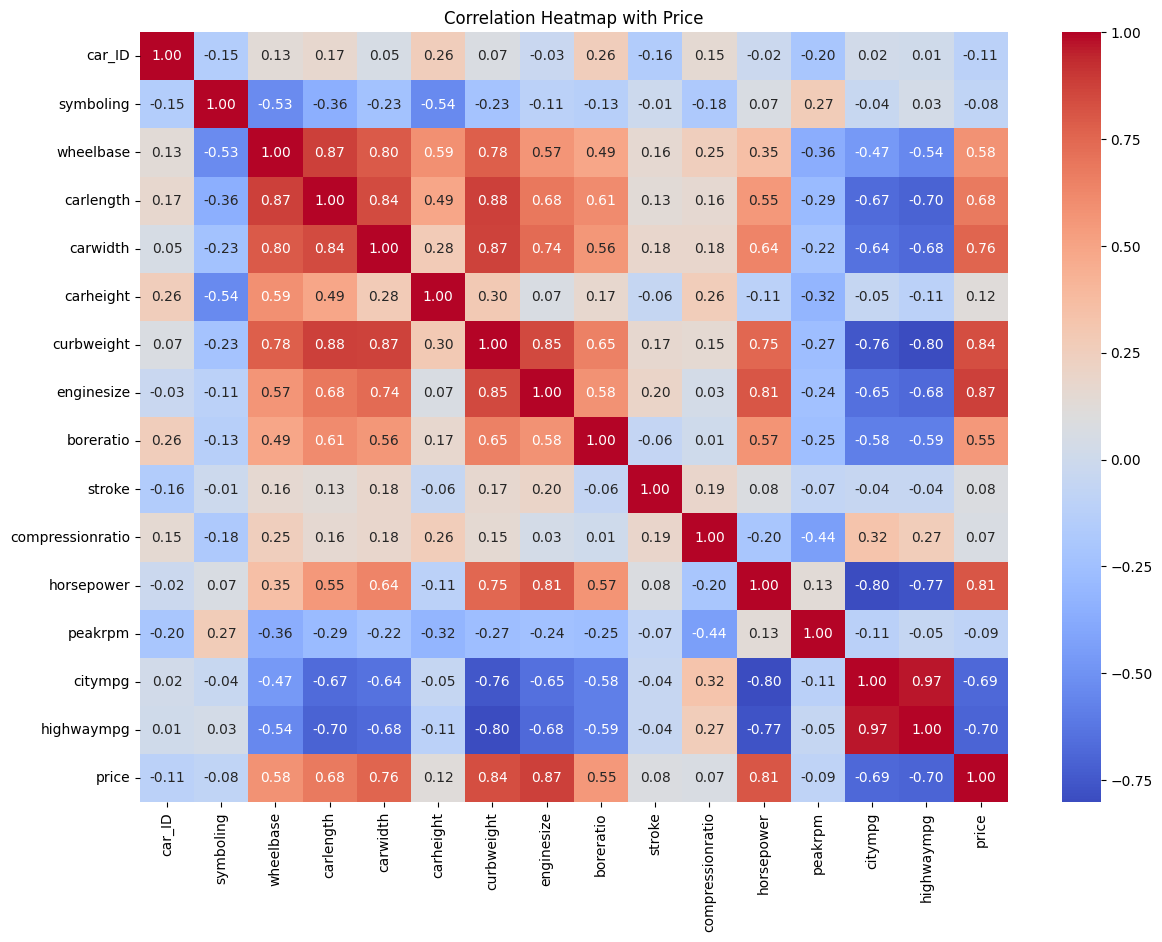

In [28]:
# Compute correlation matrix
corr = car.corr(numeric_only=True)

# Visualize correlations with heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Price")
plt.show()

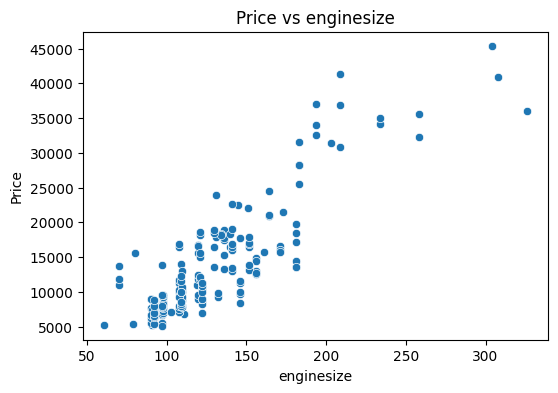

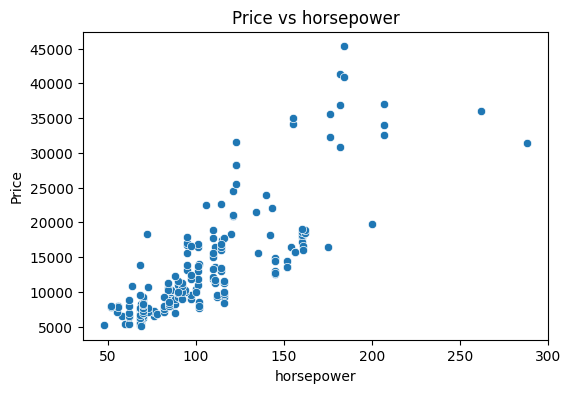

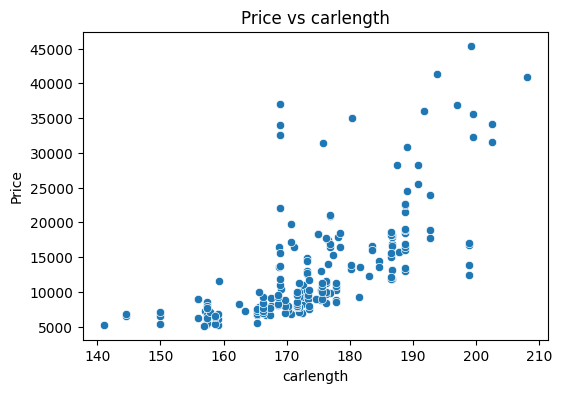

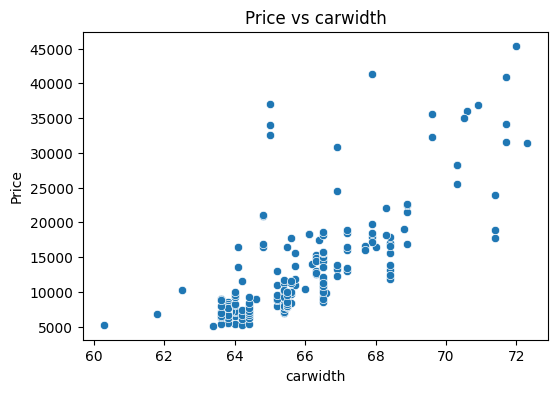

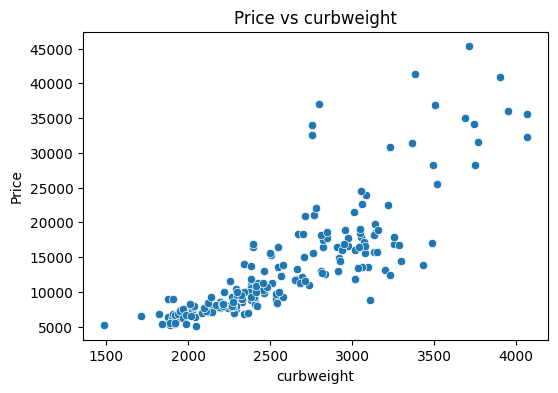

In [29]:
important_features = ['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight']  # Example

for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=car[feature], y=car['price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

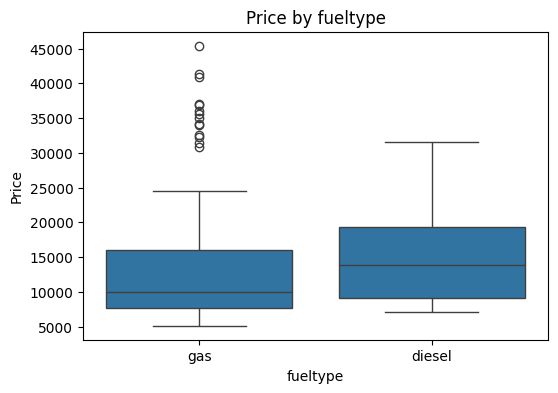

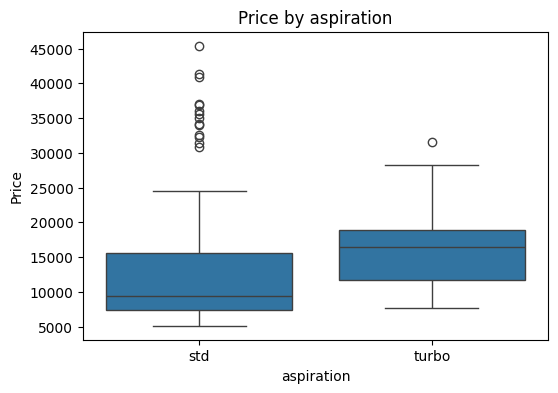

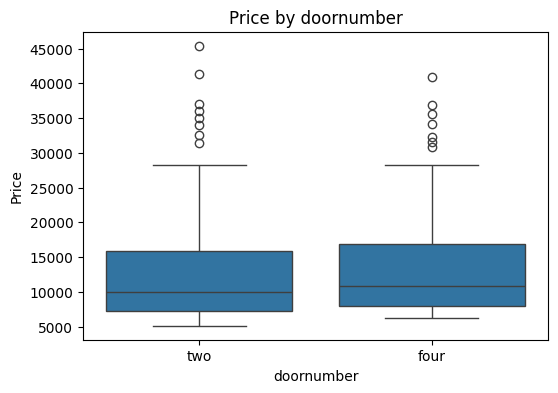

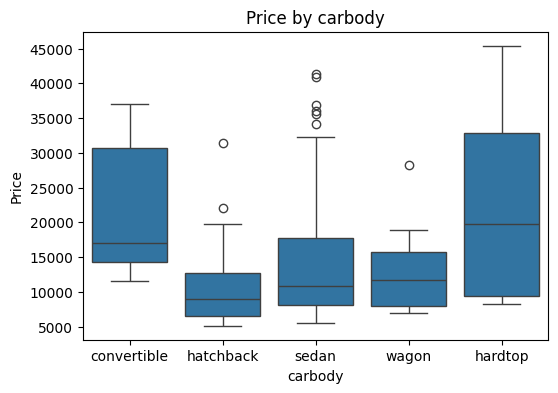

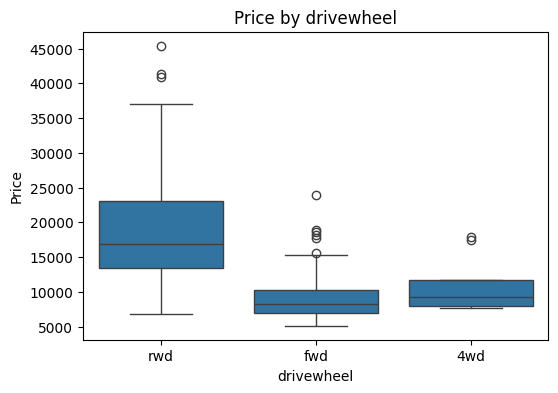

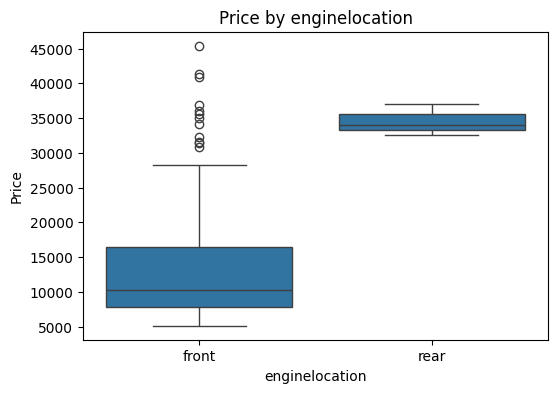

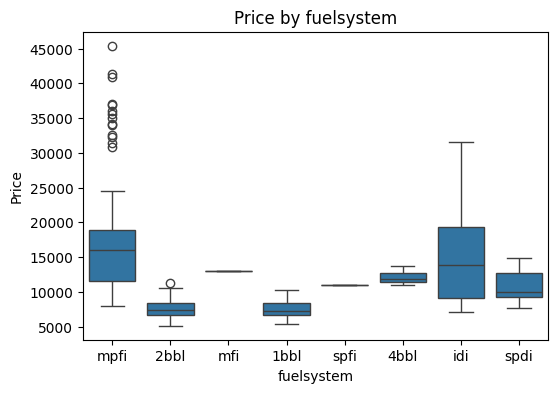

In [30]:
categorical_features = [
    'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem'
] 
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=car[feature], y=car['price'])
    plt.title(f'Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr = RandomForestRegressor()

In [39]:
rfr.fit(X.select_dtypes(include='number'), y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# Feature importance 
importances = rfr.feature_importances_
features = X.select_dtypes(include='number').columns

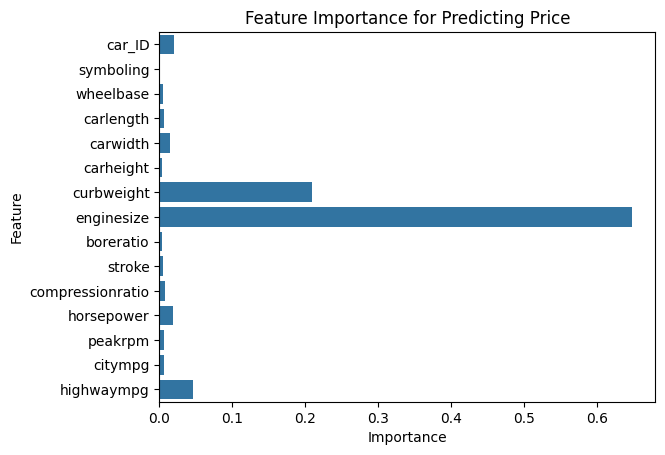

In [41]:
# Plot
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Predicting Price")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 3. Feature Selection 

In [92]:
X = car[['enginesize', 'curbweight', 'highwaympg','horsepower', 'carwidth']]
y = car['price']

In [93]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# 4. Split Data Into Training & Testing Sets 

In [94]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# 5. Scalling Data 

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train a Model 

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
y_pred = model.predict(X_test_scaled)

# 7. Evaluation of Model 

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [105]:
# R2 Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Print all metrics
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.8650
MAE: 2640.05
MSE: 12964820.65
RMSE: 3600.67


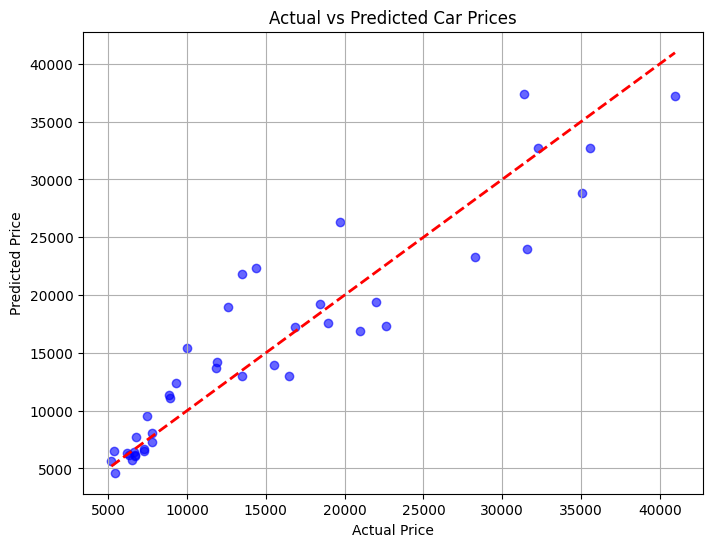

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()

# Use Another Model Random Forest Regressor 

R² Score: 0.9545
MAE: 1341.10
RMSE: 1896.25


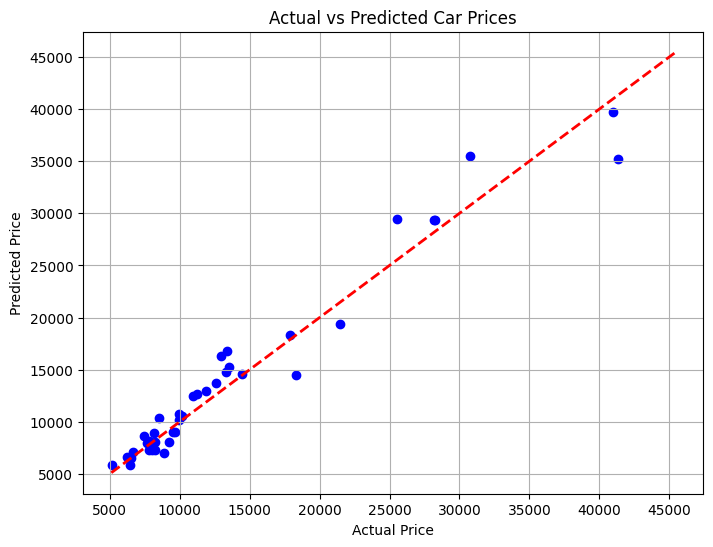

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load data
car = pd.read_csv("CarPrice.csv")

# Drop non-informative columns
car = car.drop(['car_ID', 'CarName'], axis=1)

# Select only 5 important features
X = car[['enginesize', 'curbweight', 'highwaympg','horsepower', 'carwidth']]
y = car['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()

# 8. Deployment of Model 

In [113]:
import pickle 

In [114]:
# Save the trained model
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler too (used for transforming input data)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)